# Explore model results

Load the data using [MIKE IO](https://dhi.github.io/mikeio) and review it. Data is stored as a dfsu file. Specific points are stored in a dfs0 file. 

In [1]:
import mikeio
import helper as h
import matplotlib.pyplot as plt 
plt.rcParams.update({'font.size': 10})

In [2]:
mr_fldr = "../output_sample/"
# mr_fldr = "../output/" # Change the output folder if needed  
fig_fldr = "../figures/"
save_png = False

fnames = [f"{mr_fldr}Area_2014_2018.dfsu", f"{mr_fldr}Area_2019_2022.dfsu"]
if "sample" in mr_fldr:
    fnames = [fnames[0]]

## Open the model result file

In [3]:
for f in fnames:
    dfs = mikeio.open(f)
    print(dfs)

<mikeio.Dfsu2DH>
number of elements: 8474
number of nodes: 4681
projection: LONG/LAT
items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
time: 2017-02-01 00:00:00 - 2017-02-08 00:00:00 (337 records)


## Mesh and bathymetry

In [4]:
geom = dfs.geometry

Calculate the total area covered (in km^2)

In [5]:
geom.get_element_area().sum()/(10**6)

990.645159911203

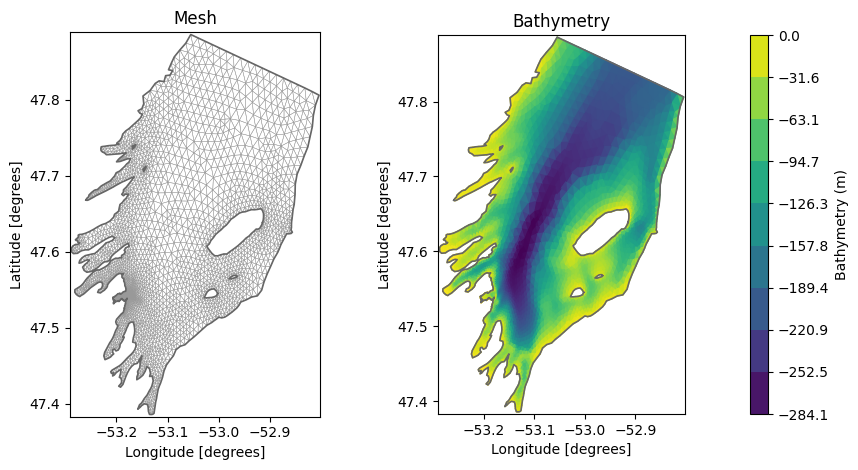

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(9, 4.8))
geom.plot.mesh(ax=axs[0])
geom.plot(ax=axs[1])
plt.tight_layout()
if save_png:
    plt.savefig(f"{fig_fldr}geometry.png")
plt.show()

## Area plots

Read data from file but exclude first two days (spin-up).

In [9]:
ds = h.read_and_concatenate_ds(fnames,out_fname=f"{mr_fldr}Area_all.dfsu")

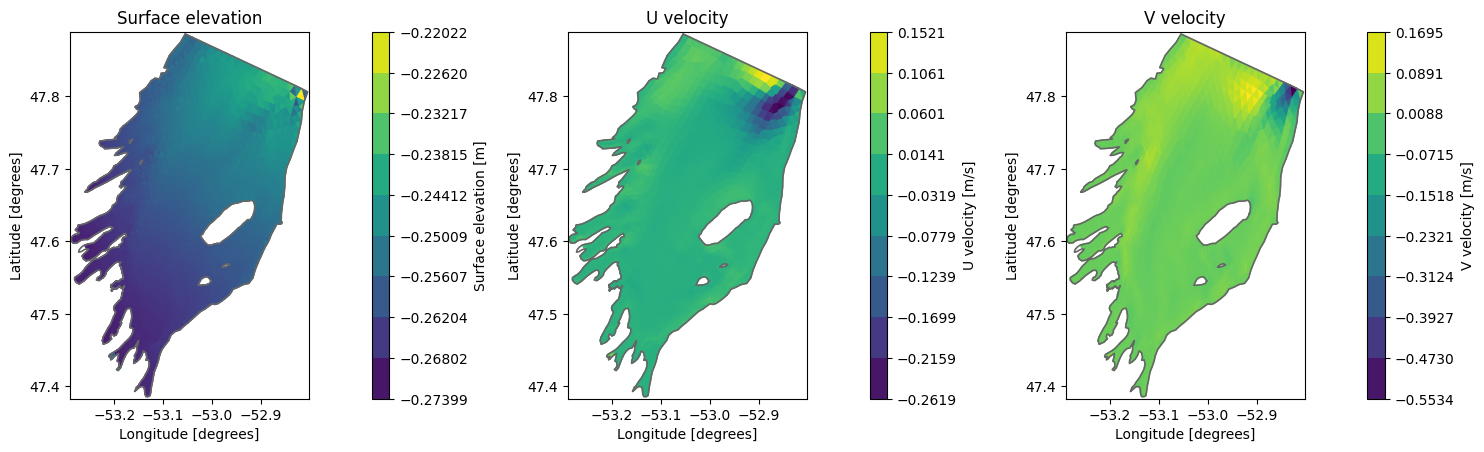

In [14]:
# Select time step and plot items
plot_time = "2019-05-01" if "2019-05-01" in ds.time else ds.time[-1]
fig,axs = plt.subplots(1, 3, figsize=(15,5))
ds["Surface elevation"].sel(time=plot_time).plot(ax=axs[0], title="Surface elevation")
ds["U velocity"].sel(time=plot_time).plot(ax=axs[1], title="U velocity")
ds["V velocity"].sel(time=plot_time).plot(ax=axs[2], title="V velocity")
plt.tight_layout()
plt.show()

## Timeseries

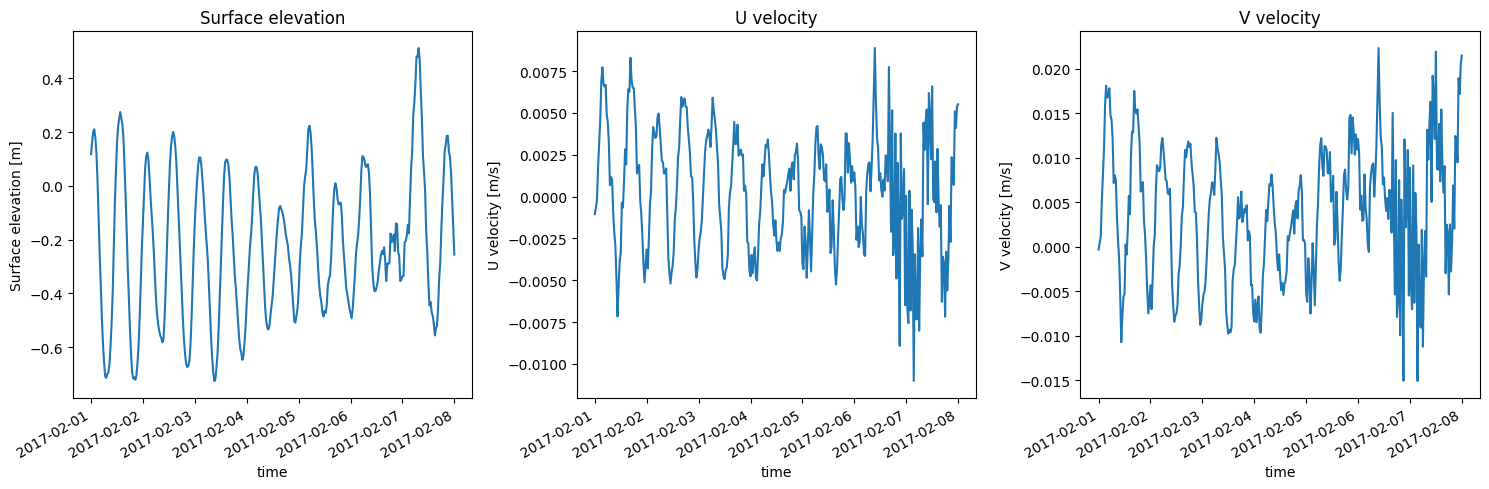

In [15]:
# Select spatial point and plot items
p = (-53.1, 47.7)
fig,axs = plt.subplots(1,3, figsize=(15,5))
ds["Surface elevation"].sel(x=p[0],y=p[1]).plot(ax=axs[0],title="Surface elevation")
ds["U velocity"].sel(x=p[0],y=p[1]).plot(ax=axs[1],title="U velocity")
ds["V velocity"].sel(x=p[0],y=p[1]).plot(ax=axs[2],title="V velocity")
plt.tight_layout()
plt.show()

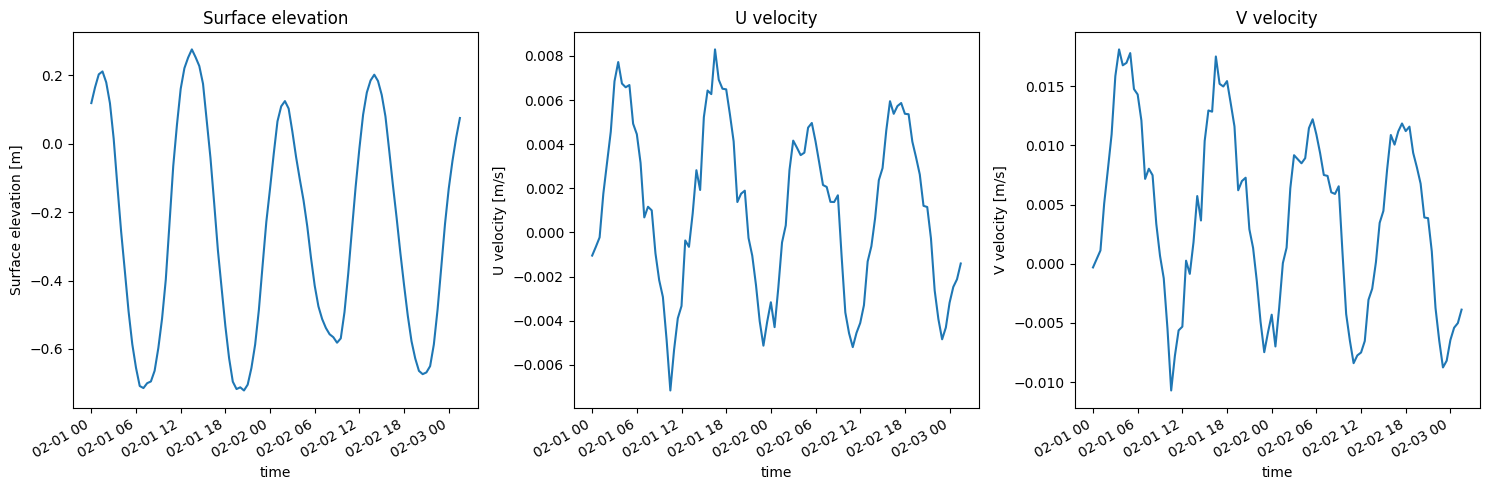

In [16]:
# Zoom in on a time interval
time_interval=slice("2019-05-01","2019-06-01") if "2019-05-01" in ds.time else ds.time[:100]
fig,axs = plt.subplots(1,3, figsize=(15,5))
ds["Surface elevation"].sel(x=p[0],y=p[1],time=time_interval).plot(ax=axs[0],title="Surface elevation")
ds["U velocity"].sel(x=p[0],y=p[1],time=time_interval).plot(ax=axs[1],title="U velocity")
ds["V velocity"].sel(x=p[0],y=p[1],time=time_interval).plot(ax=axs[2],title="V velocity")
plt.tight_layout()
plt.show()

You can go to the model_validation_*.ipynb files to see how the model results are compared to observations.